In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
units="metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather= weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp =city_weather['main']["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country =city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | omagh
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | takoradi
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | alepe
Processing Record 6 of Set 1 | ponta do sol
Processing Record 7 of Set 1 | esperance
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | palmer
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | san patricio
Processing Record 12 of Set 1 | sitka
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | saldanha
Processing Record 15 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | andenes
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | klaksvik
Processing Record 20 of Set 1 | totness
Processing Record 21 of Set 1 | sompeta
Processing Record 22 of Set 1 | busselton
Processing Record 23 of

Processing Record 40 of Set 4 | hithadhoo
Processing Record 41 of Set 4 | ullapool
Processing Record 42 of Set 4 | awbari
Processing Record 43 of Set 4 | jacareacanga
Processing Record 44 of Set 4 | mandali
Processing Record 45 of Set 4 | lashio
Processing Record 46 of Set 4 | tlahuapan
City not found. Skipping...
Processing Record 47 of Set 4 | paranavai
Processing Record 48 of Set 4 | porto walter
Processing Record 49 of Set 4 | winnemucca
Processing Record 0 of Set 5 | maragogi
Processing Record 1 of Set 5 | lumatil
Processing Record 2 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 5 | belmonte
Processing Record 4 of Set 5 | prince george
Processing Record 5 of Set 5 | constitucion
Processing Record 6 of Set 5 | moose factory
Processing Record 7 of Set 5 | gouyave
Processing Record 8 of Set 5 | kautokeino
Processing Record 9 of Set 5 | dikson
Processing Record 10 of Set 5 | neustadt
Processing Record 11 of Set 5 | lasa
Processing Record 12 of Set 5 | f

Processing Record 32 of Set 8 | kaitangata
Processing Record 33 of Set 8 | batagay-alyta
Processing Record 34 of Set 8 | xicotencatl
Processing Record 35 of Set 8 | qaqortoq
Processing Record 36 of Set 8 | san ramon de la nueva oran
Processing Record 37 of Set 8 | namatanai
Processing Record 38 of Set 8 | pitogo
Processing Record 39 of Set 8 | axim
Processing Record 40 of Set 8 | arlit
Processing Record 41 of Set 8 | damara
Processing Record 42 of Set 8 | namtsy
Processing Record 43 of Set 8 | gazni
City not found. Skipping...
Processing Record 44 of Set 8 | moindou
Processing Record 45 of Set 8 | pravia
Processing Record 46 of Set 8 | togur
Processing Record 47 of Set 8 | benjamin aceval
Processing Record 48 of Set 8 | hohhot
Processing Record 49 of Set 8 | taoudenni
Processing Record 0 of Set 9 | beterou
Processing Record 1 of Set 9 | chunoyar
Processing Record 2 of Set 9 | minab
Processing Record 3 of Set 9 | port lincoln
Processing Record 4 of Set 9 | saint-francois
Processing Reco

Processing Record 18 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 19 of Set 12 | mayo
Processing Record 20 of Set 12 | buchanan
Processing Record 21 of Set 12 | ayan
Processing Record 22 of Set 12 | dakar
Processing Record 23 of Set 12 | fayaoue
Processing Record 24 of Set 12 | torbat-e jam
Processing Record 25 of Set 12 | maltahohe
Processing Record 26 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 27 of Set 12 | bella union
Processing Record 28 of Set 12 | sturgis
Processing Record 29 of Set 12 | bilibino
Processing Record 30 of Set 12 | ucluelet
Processing Record 31 of Set 12 | trinidad
Processing Record 32 of Set 12 | bandarbeyla
Processing Record 33 of Set 12 | clearfield
Processing Record 34 of Set 12 | san jose
Processing Record 35 of Set 12 | ketchikan
Processing Record 36 of Set 12 | wajir
Processing Record 37 of Set 12 | buala
Processing Record 38 of Set 12 | fomboni
Processing Record 39 of Set 12 | wuxi
Processing Record 40 of Se

In [4]:
city_df=pd.DataFrame(city_data)
city_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [5]:
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,omagh,54.6000,-7.3000,3.70,98,100,3.96,GB,1675881800
1,hobart,-42.8794,147.3294,13.92,85,100,2.57,AU,1675881516
2,takoradi,4.8845,-1.7554,26.93,78,100,2.89,GH,1675881801
3,rikitea,-23.1203,-134.9692,26.27,74,82,6.09,PF,1675881801
4,alepe,5.5004,-3.6631,27.93,75,52,2.36,CI,1675881801


In [6]:
city_df.to_csv("cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,omagh,54.6000,-7.3000,3.70,98,100,3.96,GB,1675881800
1,hobart,-42.8794,147.3294,13.92,85,100,2.57,AU,1675881516
2,takoradi,4.8845,-1.7554,26.93,78,100,2.89,GH,1675881801
3,rikitea,-23.1203,-134.9692,26.27,74,82,6.09,PF,1675881801
4,alepe,5.5004,-3.6631,27.93,75,52,2.36,CI,1675881801


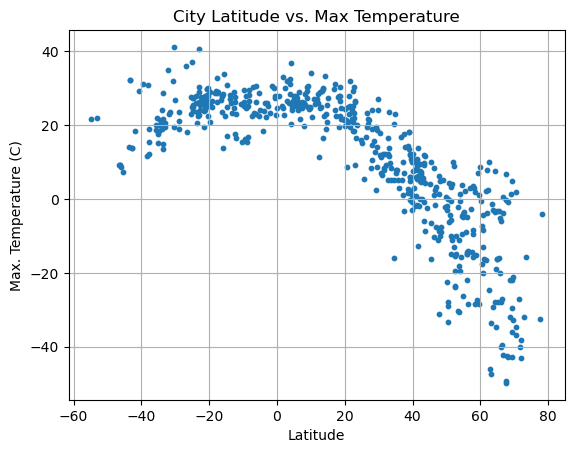

In [8]:
# Build a scatter plot for each data type
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Fig1.png")

# Show plot
plt.show()

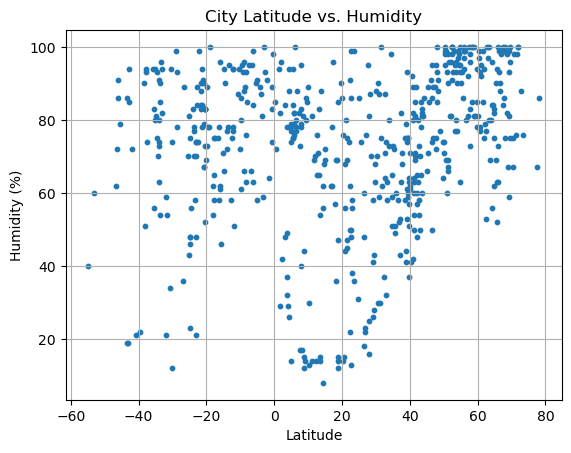

In [9]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Fig2.png")

# Show plot
plt.show()

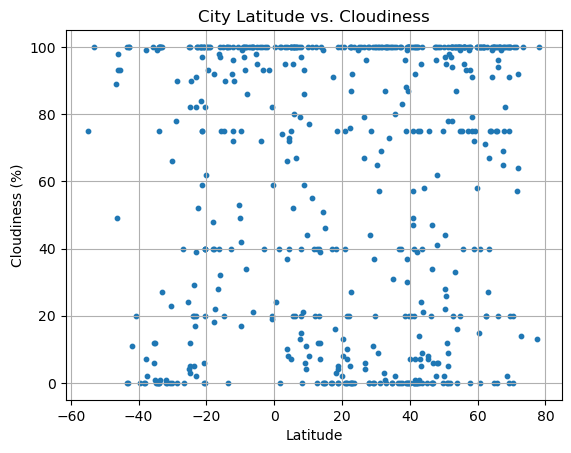

In [10]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Fig3.png")

# Show plot
plt.show()

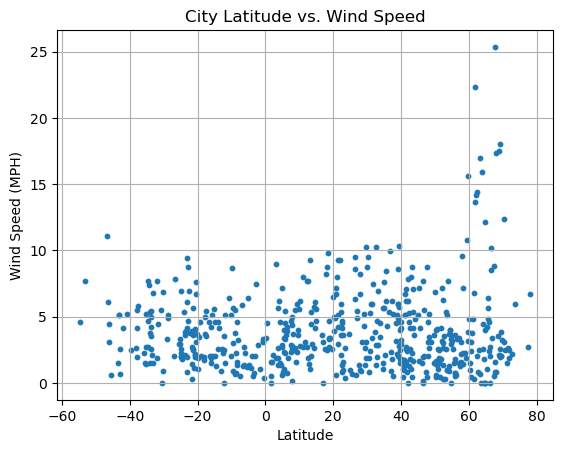

In [11]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Fig4.png")

# Show plot
plt.show()

In [16]:
from scipy import stats

In [12]:
northern_hemi_df=city_df.loc[city_df["Lat"] >=0] 
    
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,omagh,54.6000,-7.3000,3.70,98,100,3.96,GB,1675881800
2,takoradi,4.8845,-1.7554,26.93,78,100,2.89,GH,1675881801
4,alepe,5.5004,-3.6631,27.93,75,52,2.36,CI,1675881801
5,ponta do sol,32.6667,-17.1000,16.67,71,87,2.89,PT,1675881802
7,albany,42.6001,-73.9662,7.42,54,14,1.79,US,1675881700


In [13]:
southern_hemi_df=city_df.loc[city_df["Lat"] <0] 
    
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,hobart,-42.8794,147.3294,13.92,85,100,2.57,AU,1675881516
3,rikitea,-23.1203,-134.9692,26.27,74,82,6.09,PF,1675881801
6,esperance,-33.8667,121.9000,19.05,73,100,5.46,AU,1675881802
9,punta arenas,-53.1500,-70.9167,22.01,60,100,7.72,CL,1675881803
12,ushuaia,-54.8000,-68.3000,21.81,40,75,4.63,AR,1675881804


The r-value is: 0.7310709118348284


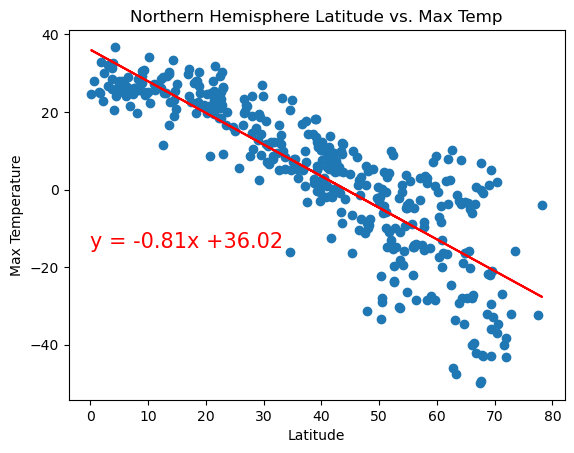

In [60]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Get regression values
regress_values =northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.annotate(line_eq,(0,-15),fontsize=15,color="red")
plt.title('Northern Hemisphere Latitude vs. Max Temp')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


The r-value is: 0.1267349549543893


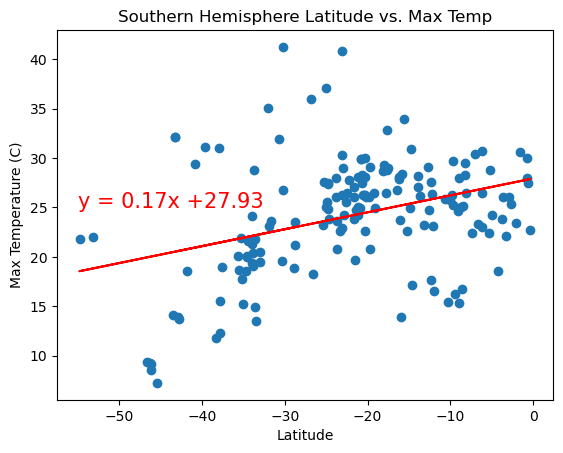

In [61]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Get regression values
regress_values =southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.annotate(line_eq,xy=(-55,25),fontsize=15,color="red")
plt.title('Southern Hemisphere Latitude vs. Max Temp')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.1994237773595928


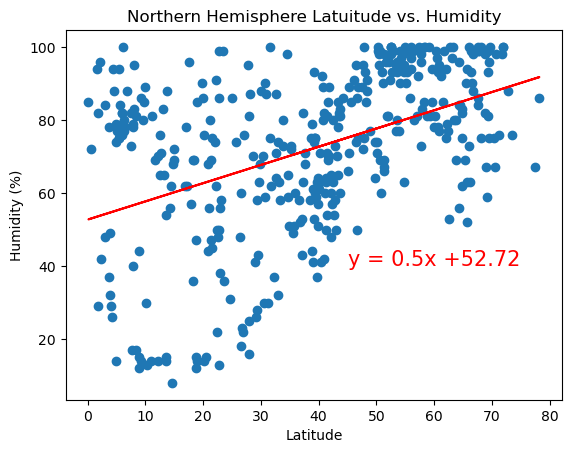

In [62]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Get regression values
regress_values =northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(45,40),fontsize=15,color="red")
plt.title('Northern Hemisphere Latuitude vs. Humidity')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


The r-value is: 0.06568774184504236


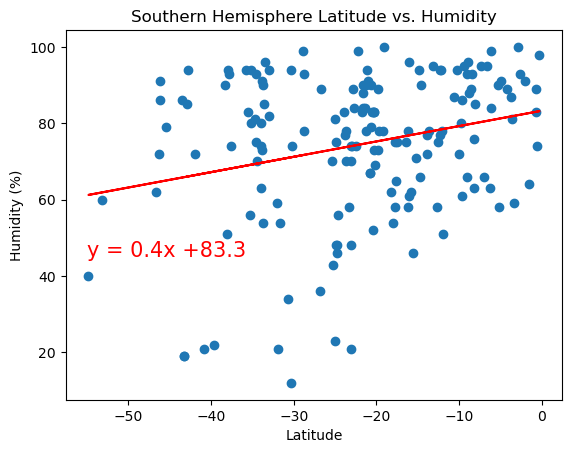

In [57]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Get regression values
regress_values =southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,xy=(-55,45),fontsize=15,color="red")
plt.title('Southern Hemisphere Latitude vs. Humidity')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.029208613364251262


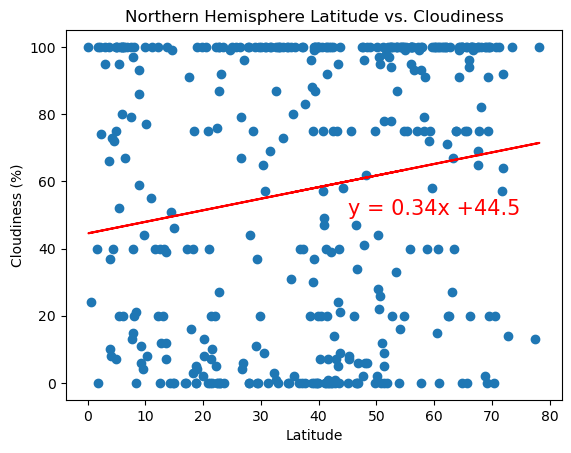

In [56]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Get regression values
regress_values =northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(45,50),fontsize=15,color="red")
plt.title('Northern Hemisphere Latitude vs. Cloudiness')
# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.07808430232124965


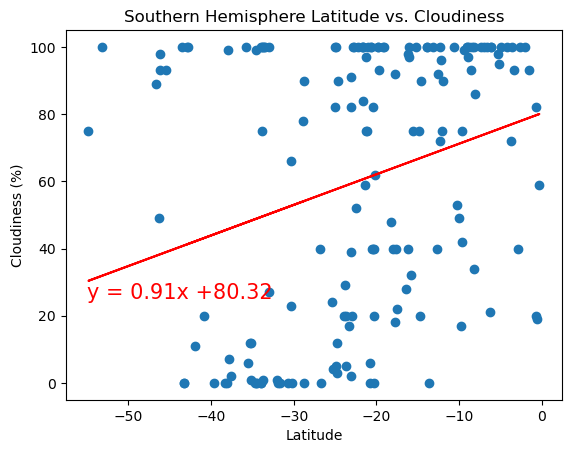

In [55]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Get regression values
regress_values =southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,xy=(-55,25),fontsize=15,color="red")
plt.title('Southern Hemisphere Latitude vs. Cloudiness')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.006664277333707288


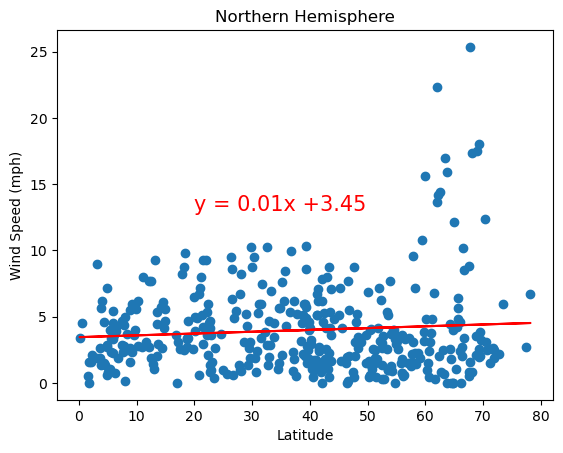

In [52]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Get regression values
regress_values =northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(20,13),fontsize=15,color="red")
plt.title('Northern Hemisphere')
# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.06331157120191198


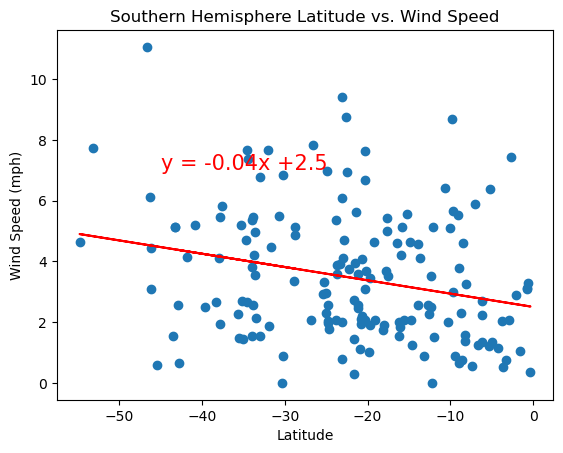

In [54]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Get regression values
regress_values =southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,xy=(-45,7),fontsize=15,color="red")
plt.title('Southern Hemisphere Latitude vs. Wind Speed')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()